In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np
subh = np.loadtxt('../_data/subhalos.dat')

halo_mask, = np.where((subh[:,15]==0) & (subh[:,16]==0))

subh_name = subh[:,0][halo_mask]
subh_ind  = np.int_(subh_name)
# nsubh = len(subh_name)

print(subh_ind)

[ 0  1  3  4  5  6  7  9 20 21 22 27 28 31 33 35 36 37 38 39 41 42 45 46
 49 50 51 53 54 64 65 66 69 73 74 79 84 85 87 88 90 91 92 95 96]


In [2]:
import density

In [ ]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.1, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in subh_ind[:8]:
    
    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    R200 = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    sft  = snap['/Str/FormationTime'][()]

    aa,  = np.where(sft>0)
    age  = time.conv2(sft[aa], h, Om_L, Om_M)
    age  = np.nanmax(age) - age

    xstr = pstr[aa,0]*aexp/h
    ystr = pstr[aa,1]*aexp/h
    zstr = pstr[aa,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[aa,0] *np.sqrt(aexp)
    v_y = vstr[aa,1] *np.sqrt(aexp)
    v_z = vstr[aa,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[aa]/h

    veloc,=np.where(rstr < 3)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2 )
    
    limit, = np.where(rn < 0.15*R200 )
    
    R = np.sqrt(xn[limit]**2+yn[limit]**2)
    
    nbin = 25
    den = density.surf_density(R,mstr[limit]*1e10,nbin)
    
    ax.plot(den[1],np.log10(den[0]), ls='-', label='subh_'+str('%03d'%j))

ax.minorticks_on()
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
# ax.set_xlim(0,14)
ax.set_ylabel('$log_{10}$($\Sigma$ / $M_{\odot}$ $kpc^{-2}$)',fontsize=15)
ax.set_xlabel('R [kpc]',fontsize=15)
ax.legend(fontsize=15,frameon=False)

# fig.savefig('../_imagenes/surf_density.png',dpi=100, xxbox_inches='tight')

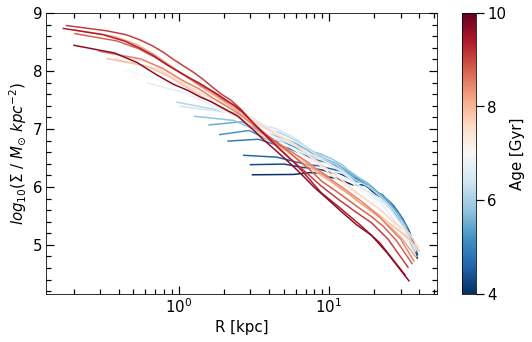

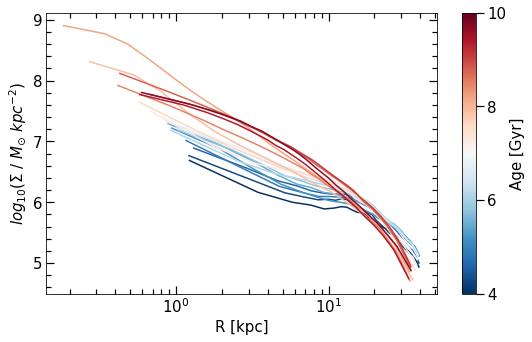

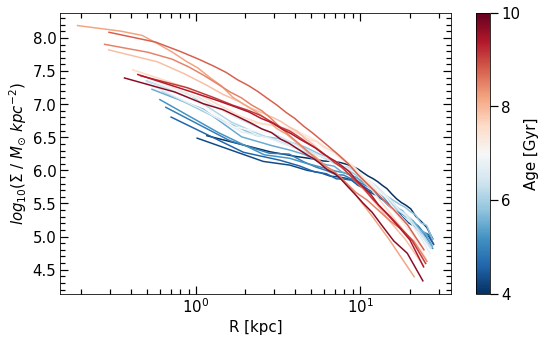

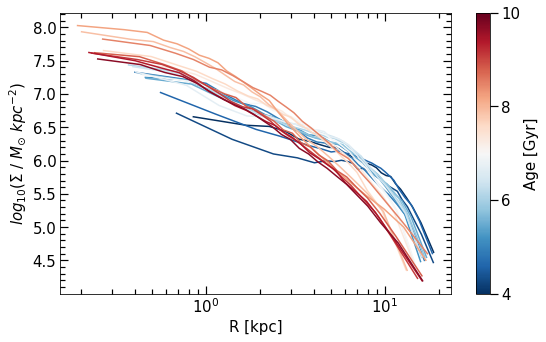

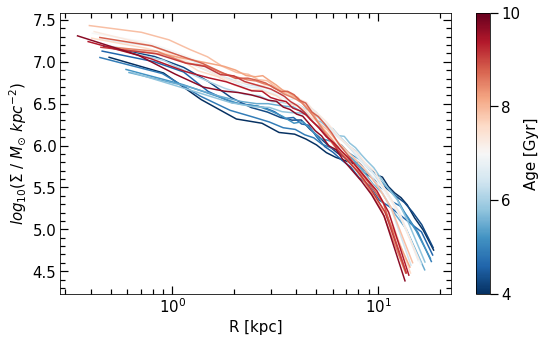

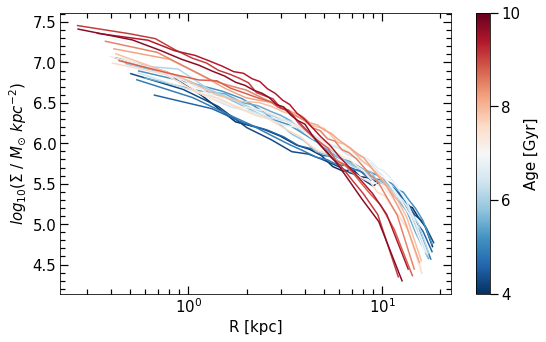

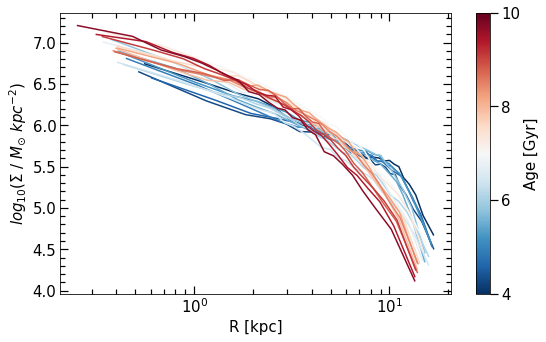

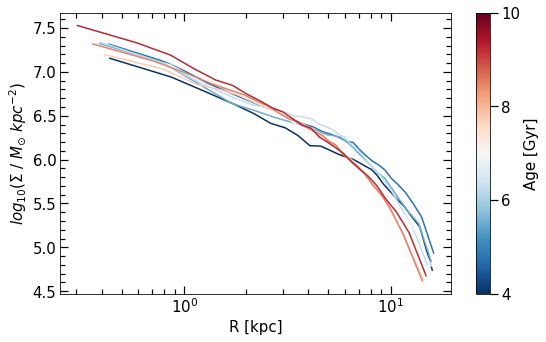

In [204]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines
import matplotlib as mpl


path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in subh_ind[:8]:
    
    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    R200 = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    sft  = snap['/Str/FormationTime'][()]

    aa,  = np.where(sft>0)
    age  = time.conv2(sft[aa], h, Om_L, Om_M)
    age  = np.nanmax(age) - age

    xstr = pstr[aa,0]*aexp/h
    ystr = pstr[aa,1]*aexp/h
    zstr = pstr[aa,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[aa,0] *np.sqrt(aexp)
    v_y = vstr[aa,1] *np.sqrt(aexp)
    v_z = vstr[aa,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[aa]/h

    veloc,=np.where(rstr < 3)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2 )
    
    limit, = np.where(rn < 0.15*R200 )
    
    age_ = age[limit]
    
    
#     edades, = np.where((age_>4) & (age_<10))
    x_str = xn[limit]
    y_str = yn[limit]
    z_str = zn[limit]
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)
    
    if j == 9:
        nb = 8
    else:
        nb = 20

    delta = (10.-4.)/nb
    rango = np.arange(4,10,delta)
    
    
    color_range = np.linspace(4,10,nb)
    norm = mpl.colors.Normalize(vmin = color_range.min(),vmax= color_range.max())
    cmap = mpl.cm.ScalarMappable(norm = norm, cmap = 'RdBu_r')
    
    for i in rango:
        
        agelim = np.where((age_>i) & (age_<i+delta))
        
        R = np.sqrt(x_str[agelim]**2 + y_str[agelim]**2)
        mass = mstr[limit][agelim]
    
        nbin = 25
        den = density.surf_density(R,mass*1e10,nbin)
        
        ax.plot(den[1],np.log10(den[0]), ls='-',color = cmap.to_rgba(i))
    
    cbar = fig.colorbar(cmap,ticks=[4,6,8,10]) #pad=0.01)
    cbar.set_label('Age [Gyr]',fontsize=15)
    cbar.ax.tick_params( labelsize=15)
    cbar.ax.tick_params(length=8, width=1.2, which='major')
    
    ax.set_xscale('log')
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
    # ax.set_xlim(0,14)
    ax.set_ylabel('$log_{10}$($\Sigma$ / $M_{\odot}$ $kpc^{-2}$)',fontsize=15)
    ax.set_xlabel('R [kpc]',fontsize=15)
#     ax.legend(fontsize=15,frameon=False)

    fig.savefig('../_imagenes/surf_density/sd_subh_'+str('%03d'%j)+'.png',dpi=100, xxbox_inches='tight')

In [182]:
np.linspace(4,10,20)

array([ 4.        ,  4.31578947,  4.63157895,  4.94736842,  5.26315789,
        5.57894737,  5.89473684,  6.21052632,  6.52631579,  6.84210526,
        7.15789474,  7.47368421,  7.78947368,  8.10526316,  8.42105263,
        8.73684211,  9.05263158,  9.36842105,  9.68421053, 10.        ])

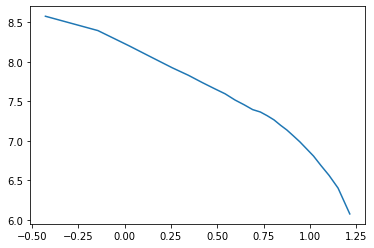

In [46]:
plt.plot(np.log10(den[1]),np.log10(den[0]))

In [3]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines

path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in subh_ind[:1]:
    
    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    R200 = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    sft  = snap['/Str/FormationTime'][()]

    aa,  = np.where(sft>0)
    age  = time.conv2(sft[aa], h, Om_L, Om_M)
    age  = np.nanmax(age) - age

    xstr = pstr[aa,0]*aexp/h
    ystr = pstr[aa,1]*aexp/h
    zstr = pstr[aa,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[aa,0] *np.sqrt(aexp)
    v_y = vstr[aa,1] *np.sqrt(aexp)
    v_z = vstr[aa,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[aa]/h

    veloc,=np.where(rstr < 3)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2 )
    
    limit, = np.where(rn < 0.15*R200 )
    
    R = np.sqrt(xn[limit]**2+yn[limit]**2)
    
    nbin = 30
    den = density.surf_density(R,mstr[limit]*1e10,nbin)
    
# fig.savefig('../_imagenes/surf_density.png',dpi=100, xxbox_inches='tight')

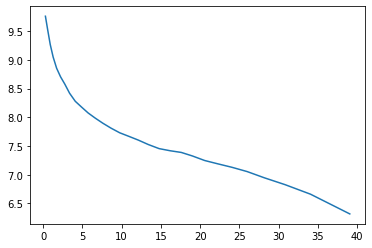

In [4]:
plt.plot(den[1],np.log10(den[0]))
# plt.xlim(0,20)

In [5]:
def func(x,a,b,c,d):
    f = np.log(a*np.exp(b*x) + c*np.exp(d*x))
    return f

In [6]:
cut0, = np.where((den[1]>0.34)&(den[1]<4))
p = np.polyfit(den[1][cut0],np.log(den[0][cut0]),1)

In [7]:
x = np.linspace(0,4)
y = p[0]*x+p[1]

In [8]:
cut1, = np.where((den[1]>8)&(den[1]<15))
p1 = np.polyfit(den[1][cut1],np.log(den[0][cut1]),1)

In [9]:
x1 = np.linspace(8,15)
y1 = p1[0]*x1+p1[1]

In [10]:
print(p1[0],p1[1])

-0.13249842215293017 19.1124029052413


In [11]:
from scipy.optimize import curve_fit
# cut, = np.where(den[1]>0.34)

cut, = np.where((den[1]>1)&(den[1]<15))

param = np.asarray([np.exp(p[1]),-1./p[0],np.exp(p1[1]),-1./p1[0]])
print(param)

popt, pcov = curve_fit(func,den[1][cut],np.log(den[0][cut]),p0=param)

[4.03985982e+09 1.15183690e+00 1.99715199e+08 7.54725969e+00]


/z/omarioni/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/z/omarioni/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Text(0.5, 0, 'R [kpc]')

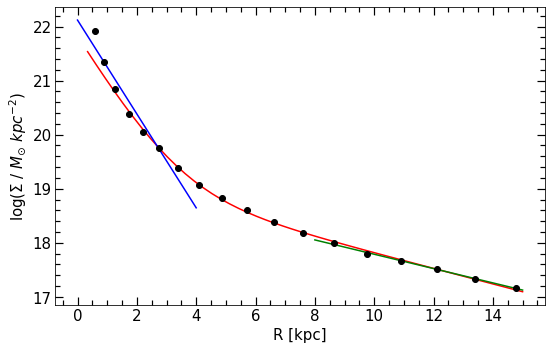

In [12]:
from scipy.stats import powerlaw
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.1, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

cut, = np.where((den[1]>0.34)&(den[1]<15))
x2 = np.linspace(0.34,15,50)
f = func(x2,popt[0],popt[1],popt[2],popt[3])
ax.plot(x2,f,'-r')
ax.plot(x,y,'-b')
ax.plot(x1,y1,'-g')
ax.plot(den[1][cut],np.log(den[0][cut]),'ko')
ax.minorticks_on()
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
# ax.set_xlim(0,14)
ax.set_ylabel('log($\Sigma$ / $M_{\odot}$ $kpc^{-2}$)',fontsize=15)
ax.set_xlabel('R [kpc]',fontsize=15)
# ax.legend(fontsize=15,frameon=False)


In [54]:
popt

array([ 1.44439523e+09, -4.43762407e-01])

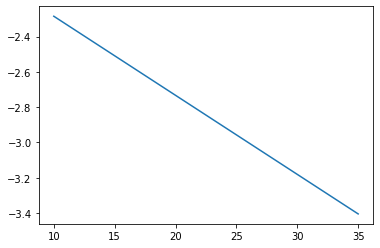

In [24]:
plt.plot(x,y)